In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("emails.csv")

In [3]:
df.sample(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
1345,Email 1346,4,7,2,3,5,3,48,5,0,...,0,0,0,0,0,1,0,0,0,1
269,Email 270,6,6,1,4,11,3,52,17,1,...,0,0,0,0,0,0,0,0,0,0
2436,Email 2437,9,19,3,5,5,3,228,2,1,...,0,0,0,2,0,0,0,7,0,1
440,Email 441,1,0,1,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3991,Email 3992,6,3,15,2,7,1,67,4,6,...,0,0,0,0,0,0,0,2,0,0


In [4]:
df.shape

(5172, 3002)

In [5]:
# The last column has the labels for prediction : 1 for spam, 0 for not spam. 
# The remaining 3000 columns are the 3000 most common words in all the emails, after excluding the non-alphabetical characters/words.

In [6]:
# split input and output data
X=df.drop(['Email No.','Prediction'],axis=1)
Y=df['Prediction']

In [7]:
X.shape

(5172, 3000)

<Axes: xlabel='Prediction', ylabel='count'>

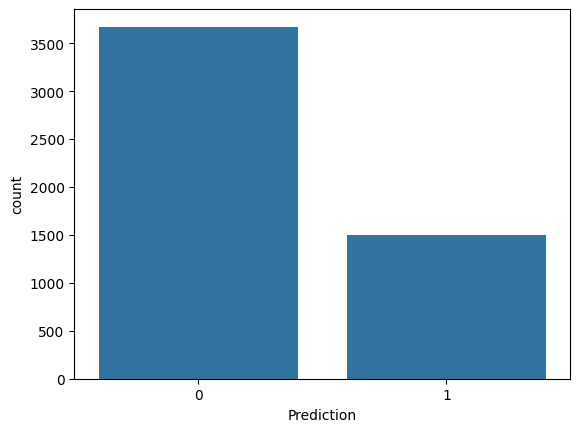

In [8]:
import seaborn as sns
sns.countplot(x=Y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [10]:
# k- nearest neighbors

from sklearn.neighbors import KNeighborsClassifier
knn_m=KNeighborsClassifier(n_neighbors=5)
# the n_neighbors parameter specifies the number of nearest neighbors to consider when making a prediction.
knn_m.fit(X_train,Y_train)

KNeighborsClassifier()

In [11]:
y_pred_knn=knn_m.predict(X_test)
y_pred_knn

array([0, 0, 1, ..., 0, 0, 0])

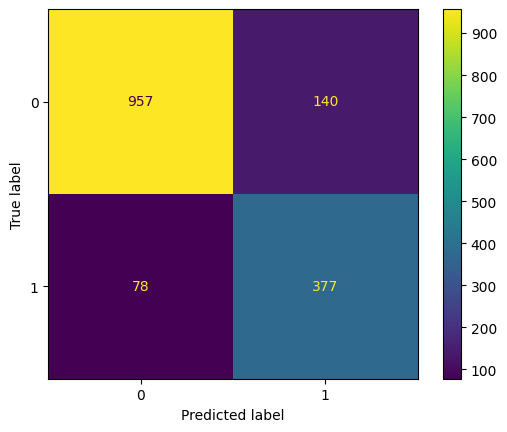

In [12]:
# evaluate
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(Y_test,y_pred_knn)

In [13]:
knn_accuracy = accuracy_score(Y_test, y_pred_knn)
knn_report = classification_report(Y_test, y_pred_knn)

print("Accuracy : ",knn_accuracy)
print("Report : ",knn_report)

Accuracy :  0.8595360824742269
Report :                precision    recall  f1-score   support

           0       0.92      0.87      0.90      1097
           1       0.73      0.83      0.78       455

    accuracy                           0.86      1552
   macro avg       0.83      0.85      0.84      1552
weighted avg       0.87      0.86      0.86      1552



In [14]:
## Support Vector Machine

from sklearn.svm import SVC
svm_model=SVC()

In [15]:
svm_model.fit(X_test,Y_test)

SVC()

In [16]:
y_pred_svm=svm_model.predict(X_test)
y_pred_svm

array([0, 0, 1, ..., 0, 0, 0])

In [17]:
svm_accuracy = accuracy_score(Y_test, y_pred_svm)
svm_report = classification_report(Y_test, y_pred_svm)

print("Accuracy : ",svm_accuracy)
print("Report : ",svm_report)

Accuracy :  0.7744845360824743
Report :                precision    recall  f1-score   support

           0       0.76      0.99      0.86      1097
           1       0.89      0.26      0.41       455

    accuracy                           0.77      1552
   macro avg       0.83      0.63      0.63      1552
weighted avg       0.80      0.77      0.73      1552

